In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os 
import cv2
import random
from PIL import Image as im
import pandas as pd 
#from skimage import data
#from skimage import filters
#from skimage.color import rgb2gray
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras import datasets, layers, models
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.utils import to_categorical

In [4]:
pip install h5py

Note: you may need to restart the kernel to use updated packages.


In [1]:
import keras
model_name = "mutiple_Conv1D_8_inputs_scaled_modified"
model = keras.models.load_model("D:/Project2022/models/"+model_name+".h5")

In [2]:
DATADIR = "D:/Project2022/res"
img = "chestXray.jpg"

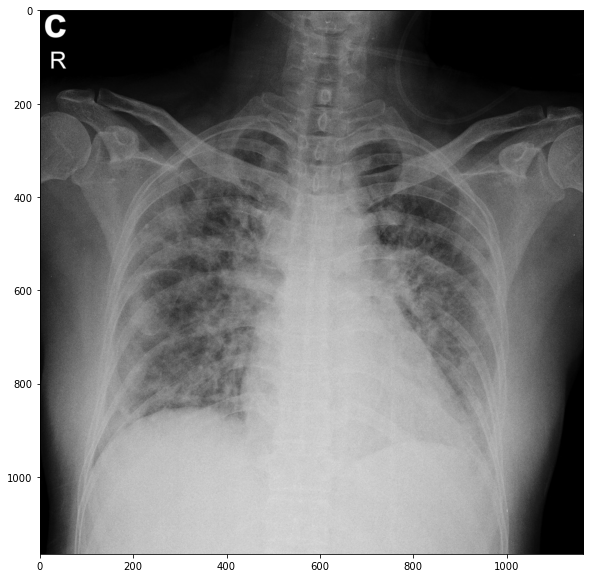

In [3]:
img_array = cv2.imread(os.path.join(DATADIR,img), cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=[10,10])
plt.imshow(img_array, cmap="gray")
#plt.imshow(img_array, cmap="viridis")
plt.show()



In [4]:
img_array

array([[163, 164, 164, ..., 164, 164, 164],
       [  1,   1,   2, ...,   0,   0,   0],
       [  3,   3,   3, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)

In [50]:
img_array.shape

(1165, 1165)

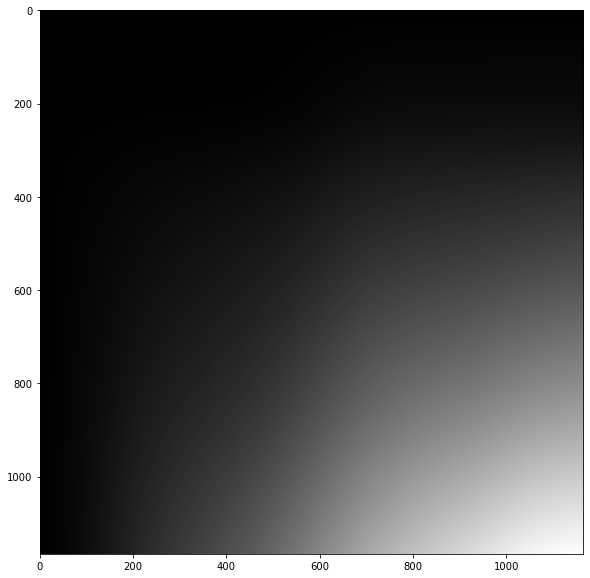

In [43]:
integral_image = cv2.integral(img_array)
plt.figure(figsize=(10, 10))
plt.imshow(integral_image, cmap="gray")
plt.show()

## row-wise sum

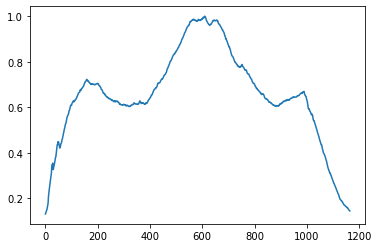

In [44]:
sum_row = img_array.sum(axis=0)
sum_row = sum_row/max(sum_row)
plt.plot(sum_row)

## coloumn wise sum

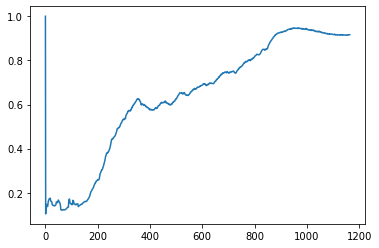

In [45]:
sum_row = img_array.sum(axis=1)
sum_row = sum_row/max(sum_row)
plt.plot(sum_row)

## Chest X-ray

In [59]:
#path D:\Project2022\res\Datasets\ChestXray3(Covid)\Normal\images

In [6]:
training_data = []
integral_data=[]
path = "D:/Project2022/res/Datasets/ChestXray3(Covid)/Normal/images"
for img in tqdm(os.listdir(path)):
    #print(img)
    img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
    img_integral = cv2.integral(img_array)
    training_data.append(img_array)
    integral_data.append(img_integral)
    

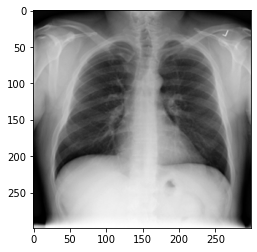

In [8]:
plt.imshow(training_data[1], cmap="gray")


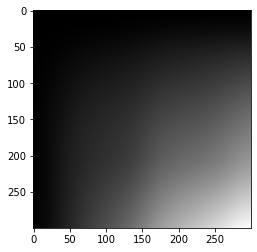

In [32]:
plt.imshow(integral_data[1], cmap="gray")

In [20]:
chest_Xray_df = pd.DataFrame()
chest_Xray_df["raw data"] = training_data
chest_Xray_df["integral data"] = integral_data

In [33]:
chest_Xray_df.shape

(10192, 2)

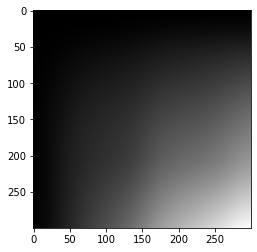

In [31]:
plt.imshow(chest_Xray_df["integral data"][1], cmap="gray")

In [35]:
chest_Xray_df.to_csv("chest_Xray.csv")

## Chest CT scan

In [46]:
path = "D:/Project2022/res/Datasets/CT1/2COVID/"

In [47]:
training_data = []
integral_data=[]
for img in tqdm(os.listdir(path)):
    img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
    img_integral = cv2.integral(img_array)
    training_data.append(img_array)
    integral_data.append(img_integral)
    break

In [45]:
ct_Xray_df = pd.DataFrame()
ct_Xray_df["raw data"] = training_data
ct_Xray_df["integral data"] = integral_data

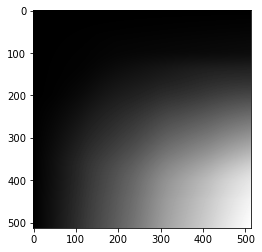

In [49]:
plt.imshow(ct_Xray_df["integral data"][1], cmap="gray")

In [50]:
ct_Xray_df.to_csv("ct_chest.csv")

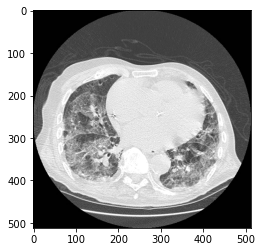

In [49]:
plt.imshow(img_array, cmap="gray")

In [2]:

def plot_Xray(filename, img_array):

    integral_image = cv2.integral(img_array)
    row_sum = img_array.sum(axis=0)
    coloumn_sum = img_array.sum(axis=1)
    

    fig = plt.figure(figsize=(12, 9))
    ax1 = fig.add_subplot(221)
    ax2 = fig.add_subplot(222)
    ax3 = fig.add_subplot(223)
    ax4 = fig.add_subplot(224)
    ax1.set_title("X-ray")
    ax1.imshow(img_array, cmap="gray")
    ax2.set_title("Integral Image")
    ax2.imshow(integral_image, cmap="gray")
    ax3.title.set_text('Row-wise sum')
    ax3.plot(row_sum/max(row_sum))
    ax4.title.set_text('coloumn-wise sum')
    ax4.plot(coloumn_sum/max(coloumn_sum))
    plt.savefig('CT/'+filename, bbox_inches='tight')
    plt.close()
    #plt.show()



In [4]:
path = "D:/Project2022/res/Datasets/CT1/2COVID/"
for img in tqdm(os.listdir(path)):
    #print(img)
    img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
    plot_Xray(img, img_array)
    
    

    
    
    

In [2]:
def store_Xray_data(path):

    df_data = pd.DataFrame()
    raw_image = []
    row_sum = []
    coloumn_sum = []
    concat_data = []
    

    for img in tqdm(os.listdir(path)):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        img_array = cv2.resize(img_array, (512,512), interpolation= cv2.INTER_LINEAR)
        row = img_array.sum(axis=0)
        coloumn = img_array.sum(axis=1)
        concat = np.concatenate((row, coloumn))
        raw_image.append(img_array)
        row_sum.append(row)
        coloumn_sum.append(coloumn)
        concat_data.append(concat)
       

    
    df_data["raw data"] = raw_image
    df_data["row sum"] = row_sum
    df_data["coloumn sum"] = coloumn_sum
    df_data["concat data"] = concat_data
    

    return df_data
            
    


## Closed or Open lungs model

In [3]:
# fetch ct scans
path = "D:/Project2022/res/Datasets/CT1/2COVID/"

open_lungs_df = store_Xray_data(path)

In [4]:
open_lungs_df["label"] = 0

In [5]:
open_lungs_df.head()

,raw data,row sum,coloumn sum,concat data,label
0,"[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...","[3253, 5121, 6537, 8271, 8782, 10041, 11186, 1...","[3437, 4448, 5431, 6457, 6774, 7550, 7851, 854...","[3253, 5121, 6537, 8271, 8782, 10041, 11186, 1...",0
1,"[[18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, ...","[45358, 45992, 47568, 49191, 49532, 50210, 495...","[11800, 11756, 11831, 11769, 11842, 11968, 118...","[45358, 45992, 47568, 49191, 49532, 50210, 495...",0
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[2263, 3534, 4842, 7971, 7836, 9181, 8693, 995...","[1860, 3268, 4155, 4713, 5447, 5977, 6414, 692...","[2263, 3534, 4842, 7971, 7836, 9181, 8693, 995...",0
3,"[[13, 10, 14, 19, 11, 17, 32, 22, 9, 21, 30, 1...","[102464, 103575, 103385, 104115, 104132, 10516...","[102682, 103723, 104832, 104867, 104514, 10453...","[102464, 103575, 103385, 104115, 104132, 10516...",0
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[10702, 13011, 14956, 16915, 18659, 20192, 216...","[9969, 10466, 11073, 11541, 11965, 12518, 1285...","[10702, 13011, 14956, 16915, 18659, 20192, 216...",0


In [8]:
open_lungs_df.to_pickle("open_lungs.pickle")

In [6]:
data = open_lungs_df["concat data"].values
x_open = []
for i in data:
    x_open.append(i.tolist())
x_open = np.array(x_open)
y_open = open_lungs_df["label"].values

In [7]:
open_lungs_df["label"].value_counts()

0    7593
Name: label, dtype: int64

In [9]:
# fetch closed lungs
closed_lungs_df = pd.read_pickle("closed_lungs.pickle")

In [10]:
closed_lungs_df.head()

,raw data,row sum,coloumn sum,concat data,label
0,"[[-2048, -2048, -2048, -2048, -2048, -2048, -2...","[-1014516, -989027, -972085, -959724, -947644,...","[-1015248, -990066, -973130, -960371, -947865,...","[-1014516, -989027, -972085, -959724, -947644,...",1
1,"[[-2048, -2048, -2048, -2048, -2048, -2048, -2...","[-1015028, -989760, -973157, -960620, -948128,...","[-1015405, -990358, -973364, -961042, -948787,...","[-1015028, -989760, -973157, -960620, -948128,...",1
2,"[[-2048, -2048, -2048, -2048, -2048, -2048, -2...","[-1014880, -989493, -972790, -960463, -947920,...","[-1015193, -990104, -973586, -961363, -949034,...","[-1014880, -989493, -972790, -960463, -947920,...",1
3,"[[-2048, -2048, -2048, -2048, -2048, -2048, -2...","[-1014847, -989716, -973025, -960329, -947620,...","[-1015291, -990222, -973767, -961392, -948723,...","[-1014847, -989716, -973025, -960329, -947620,...",1
4,"[[-2048, -2048, -2048, -2048, -2048, -2048, -2...","[-1015015, -989928, -973241, -960578, -947996,...","[-1015939, -991553, -975304, -963083, -950619,...","[-1015015, -989928, -973241, -960578, -947996,...",1


In [11]:

data = closed_lungs_df["concat data"].values
x_closed = []
for i in data:
    x_closed.append(i.tolist())
x_closed = np.array(x_closed)
y_closed = closed_lungs_df["label"].values

In [14]:
# concat two classes
dataset_X = np.concatenate((x_open, x_closed), axis=0)
dataset_y = np.concatenate((y_open,y_closed), axis=0)

In [15]:
#resample class 1
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy='minority')
X, y = oversample.fit_resample(dataset_X, dataset_y)


In [19]:
# after resampling
df_dataset = pd.DataFrame()
df_dataset["label"] = y
df_dataset["label"].value_counts()

1    7593
0    7593
Name: label, dtype: int64

In [20]:
#normalize the data
from sklearn import preprocessing
norm = preprocessing.normalize(X)

In [24]:
# change dimensions for training 
dataset_X = np.expand_dims(norm, axis=-1)
dataset_y = np.expand_dims(y, axis=-1)

In [26]:
dataset_X.shape

(15186, 1024, 1)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(dataset_X, dataset_y, shuffle=True, test_size=0.20, random_state=0)

In [28]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(1024, 1)))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))

model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [29]:
result = model.fit(X_train, y_train,10,5)

Epoch 1/5
1215/1215 [==============================] - 37s 30ms/step - loss: 0.0018 - accuracy: 0.9994
Epoch 2/5
1215/1215 [==============================] - 37s 30ms/step - loss: 2.6791e-09 - accuracy: 1.0000
Epoch 3/5
1215/1215 [==============================] - 37s 30ms/step - loss: 1.9506e-09 - accuracy: 1.0000
Epoch 4/5
1215/1215 [==============================] - 36s 30ms/step - loss: 1.4878e-09 - accuracy: 1.0000
Epoch 5/5
1215/1215 [==============================] - 36s 30ms/step - loss: 1.1641e-09 - accuracy: 1.0000


In [30]:
model.save("models/open_close.h5")

In [1]:
import keras
model_name = "open_close"
model = keras.models.load_model("D:/Project2022/code/models/"+model_name+".h5")

In [2]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 1022, 64)          256       
                                                                 
 conv1d_1 (Conv1D)           (None, 1020, 64)          12352     
                                                                 
 dropout (Dropout)           (None, 1020, 64)          0         
                                                                 
 max_pooling1d (MaxPooling1D  (None, 510, 64)          0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 32640)             0         
                                                                 
 dense (Dense)               (None, 100)               3264100   
                                                        

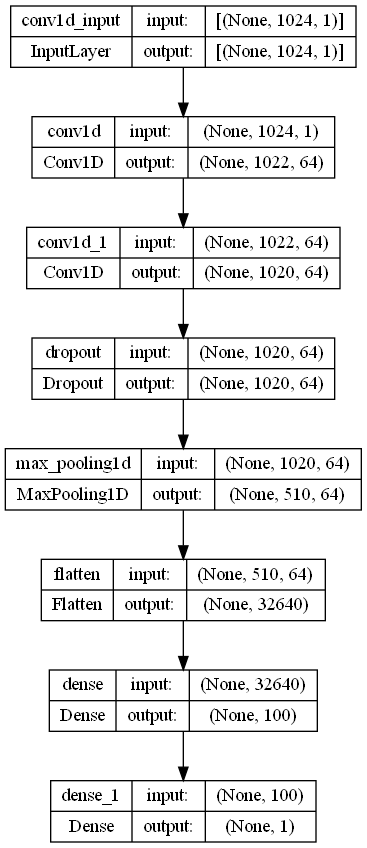

In [3]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [7]:
pip install graphviz 

Note: you may need to restart the kernel to use updated packages.


In [31]:
result.history

{'loss': [0.0018326460849493742,
  2.6790665241804845e-09,
  1.9506098958288476e-09,
  1.4878482890168243e-09,
  1.1641438923959413e-09],
 'accuracy': [0.9994238018989563, 1.0, 1.0, 1.0, 1.0]}

## Evaluvation

In [32]:
# test loss, test accuracy
accuracy = model.evaluate(X_test, y_test, batch_size=100, verbose=0)

In [33]:
print("Test acuuracy", accuracy[1])
print("Test loss", accuracy[0])

Test acuuracy 1.0
Test loss 6.15480587384809e-07


In [34]:
accuracy

[6.15480587384809e-07, 1.0]

In [37]:
#y_pred = model.predict_classes(X_test)
y_pred = (model.predict(X_test) > 0.5).astype("int32")

In [38]:
y_pred[:15]

array([[0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0]])

In [39]:
y_test[:15]

array([[0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0]], dtype=int64)

### Predict one instance

In [41]:
# labels
# 0 - open lungs --------- the one we need
# 1 - closed lungs

# predict one instance

i = 345
sample = np.array([X_test[i]])
output = model.predict_classes(sample)
print("ground truth:", y_test[i][0])
print("predicted output:", output[0][0])


ground truth: 0
predicted output: 0
